In [24]:
%matplotlib_inline
import numpy as np
import matplotlib.pyplot as plt


UsageError: Line magic function `%matplotlib_nbagg` not found.


In [17]:
X = np.array([0,1,2,3,4,5,6,7,8,9,10])
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [18]:
Y = np.array([22,25,27,29,32,35,37,39,42,45,46])
Y

array([22, 25, 27, 29, 32, 35, 37, 39, 42, 45, 46])

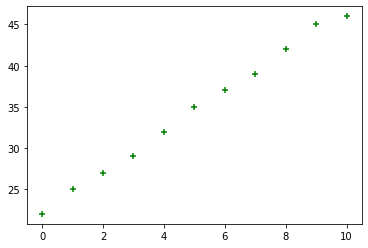

In [19]:
plt.scatter(X, Y, marker='+', c='g')

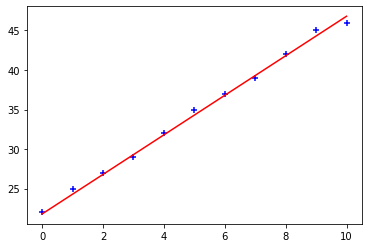

In [20]:
w = 2.5
b = 21.8
y_hat = w * X + b
plt.plot(X, y_hat, c = 'r', label='Our Prediction')
plt.scatter(X, Y, marker='+', c='b', label = 'Actual Values')
plt.show()

Manual Cost Calculation with definec W and B

In [29]:
def cost_function_manual(X, Y, w, b):
    cost = 0
    m = X.shape[0]
    for i in range(m):
        y_wb = w * X[i] + b
        cost_i = (y_wb - Y[i]) ** 2
        cost += cost_i
    return cost/(2*m)

In [30]:
print("overall cost : "+ str(cost_function_manual(X, Y, 2.5, 21.8)))

overall cost : 0.11318181818181831


In [22]:
def cost_function():
    

SyntaxError: unexpected EOF while parsing (1098726442.py, line 2)

In [ ]:
def radiengradient_descent():

